In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
filepath = '../data/raw/Housing.csv'
df = pd.read_csv(filepath)

In [6]:
print(f"Dimentions: {df.shape[0]} lignes, {df.shape[1]} colonnes")

Dimentions: 546 lignes, 13 colonnes


In [3]:
df.head()

,rownames,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  546 non-null    int64 
 1   price     546 non-null    int64 
 2   lotsize   546 non-null    int64 
 3   bedrooms  546 non-null    int64 
 4   bathrms   546 non-null    int64 
 5   stories   546 non-null    int64 
 6   driveway  546 non-null    object
 7   recroom   546 non-null    object
 8   fullbase  546 non-null    object
 9   gashw     546 non-null    object
 10  airco     546 non-null    object
 11  garagepl  546 non-null    int64 
 12  prefarea  546 non-null    object
dtypes: int64(7), object(6)
memory usage: 55.6+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rownames,546.0,273.500000,157.760895,1.0,137.25,273.5,409.75,546.0
price,546.0,68121.597070,26702.670926,25000.0,49125.00,62000.0,82000.00,190000.0
lotsize,546.0,5150.265568,2168.158725,1650.0,3600.00,4600.0,6360.00,16200.0
bedrooms,546.0,2.965201,0.737388,1.0,2.00,3.0,3.00,6.0
bathrms,546.0,1.285714,0.502158,1.0,1.00,1.0,2.00,4.0
stories,546.0,1.807692,0.868203,1.0,1.00,2.0,2.00,4.0
garagepl,546.0,0.692308,0.861307,0.0,0.00,0.0,1.00,3.0


In [12]:
df.duplicated().sum()
#df.drop_duplicates()

np.int64(0)

In [13]:
#analyse cardinalité onehoteencoding
df.select_dtypes(include='object').nunique()

driveway    2
recroom     2
fullbase    2
gashw       2
airco       2
prefarea    2
dtype: int64

GRAPHIQUES

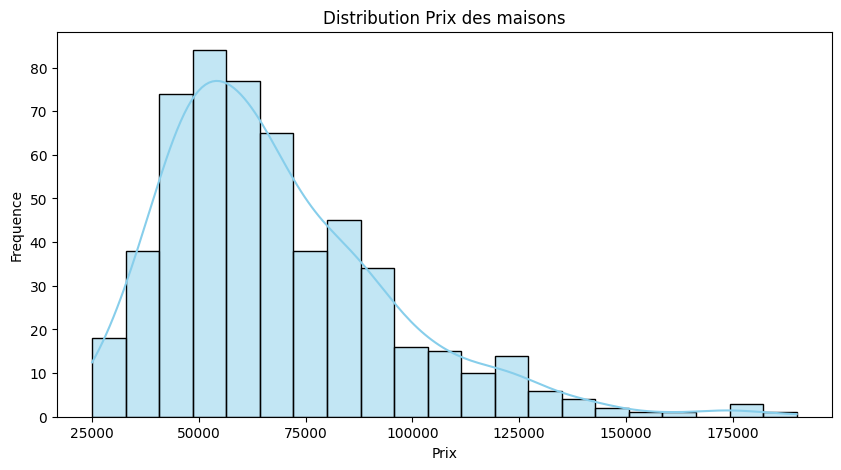

In [15]:
# Histograme avec courve densité
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True, color='skyblue')
plt.title('Distribution Prix des maisons')
plt.xlabel('Prix')
plt.ylabel('Frequence')
plt.show()

**Conclusiones**
La courbe bleue présente une légère tendance à droite (positive), ce qui est normal pour l'évolution des prix 
- (il y a peu de maisons extrêmement chères  
-  mais beaucoup de maisons de prix moyen).  
- Elle est suffisamment fiable pour être utilisée telle quelle.

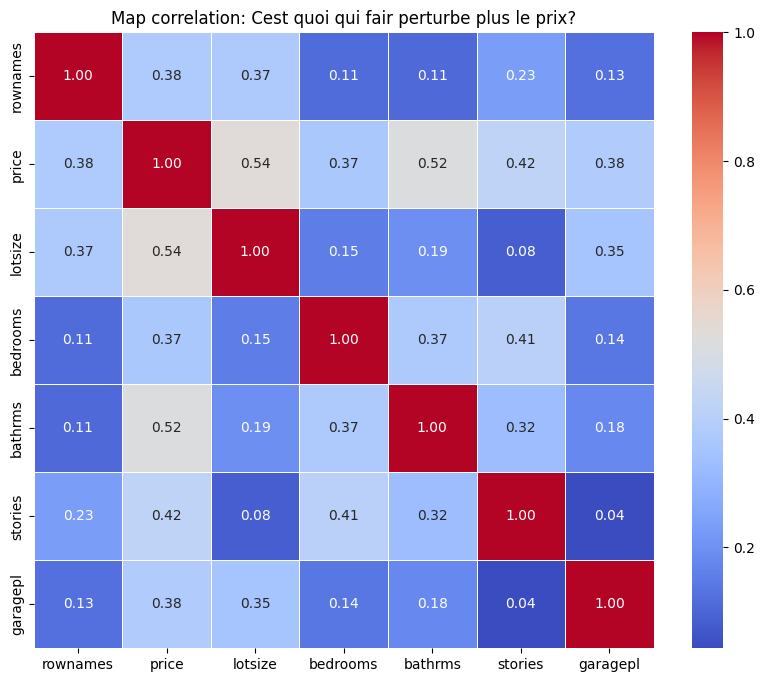

In [16]:
# Correlación col numeriques
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Map correlation: Cest quoi qui fair perturbe plus le prix?')
plt.show()

### Conclusiones
- le prix(price) a une forte correlación avec la taille de lote (lotsize) ; 0.54  
- aussi avec les toilettes (bathrms) ; 0.52  
- la col rawnames on peut s'n dbarraser, 

/tmp/ipykernel_31248/2951662607.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='price', data=df, palette='Set2')
/tmp/ipykernel_31248/2951662607.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='price', data=df, palette='Set2')
/tmp/ipykernel_31248/2951662607.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='price', data=df, palette='Set2')


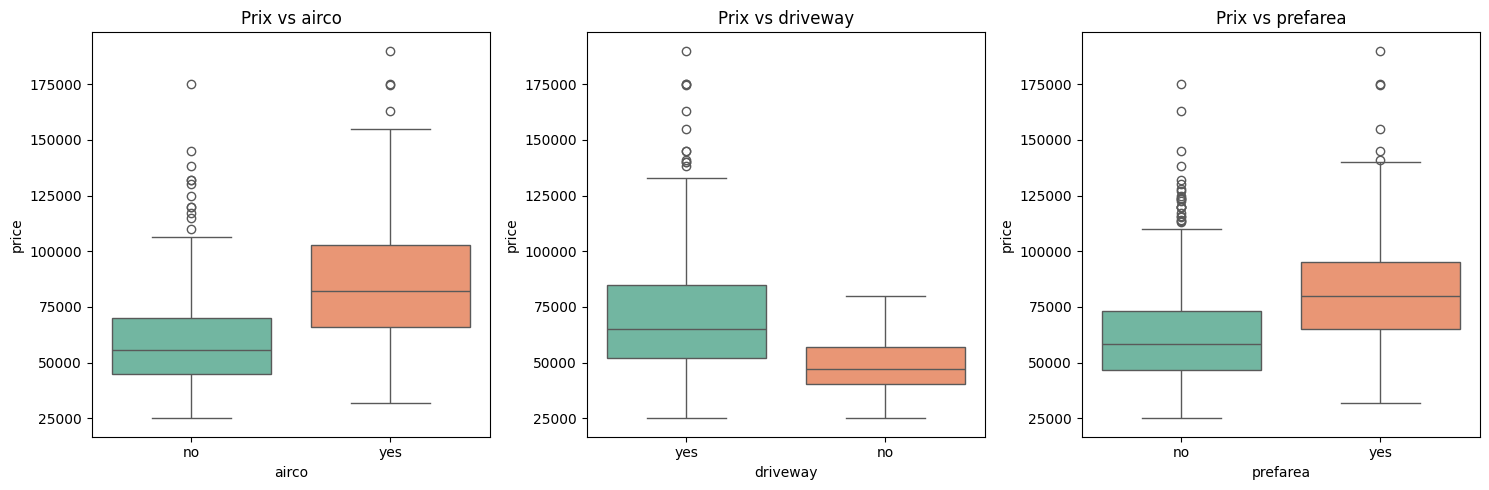

In [18]:
# Variables categóricas cle
categorical_cols = ['airco', 'driveway', 'prefarea'] 

plt.figure(figsize=(15, 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=col, y='price', data=df, palette='Set2')
    plt.title(f'Prix vs {col}')

plt.tight_layout()
plt.show()

### Conclusiones
- airco (aire conditioné), driveway et prefarea ont un for impact dans le prix (les boites "yes" sont plus hatus que "no"),
- Donc variables critiques pour le model
- il faut le transformer car ils sont avariables categoriques